In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from superpoint.settings import EXPER_PATH
import superpoint.evaluations.descriptor_evaluation as ev
from utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def draw_matches(data):
    keypoints1 = [cv2.KeyPoint(p[1], p[0], 1) for p in data['keypoints1']]
    keypoints2 = [cv2.KeyPoint(p[1], p[0], 1) for p in data['keypoints2']]
    inliers = data['inliers'].astype(bool)
    matches = np.array(data['matches'])[inliers].tolist()
    img1 = np.concatenate([output['image1'], output['image1'], output['image1']], axis=2) * 255
    img2 = np.concatenate([output['image2'], output['image2'], output['image2']], axis=2) * 255
    return cv2.drawMatches( np.uint8(img1), keypoints1,  np.uint8(img2), keypoints2, matches,
                           None, matchColor=(0,255,0), singlePointColor=(0, 0, 255))

In [15]:
experiments = ['sp_coco']  #'dist-superpoint_hp' #'superpoint_coco-all_dist'

# Visualization

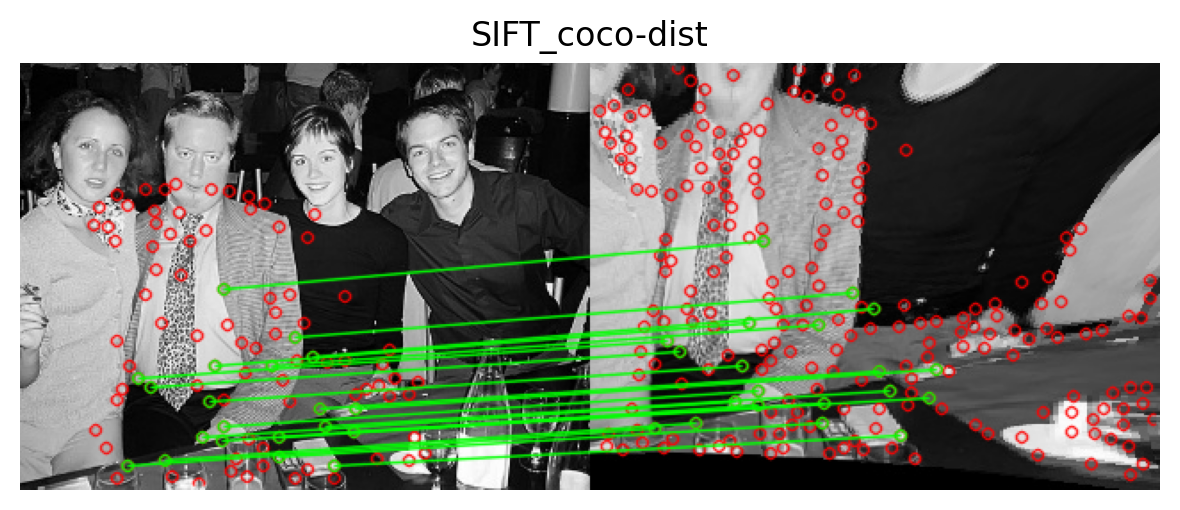

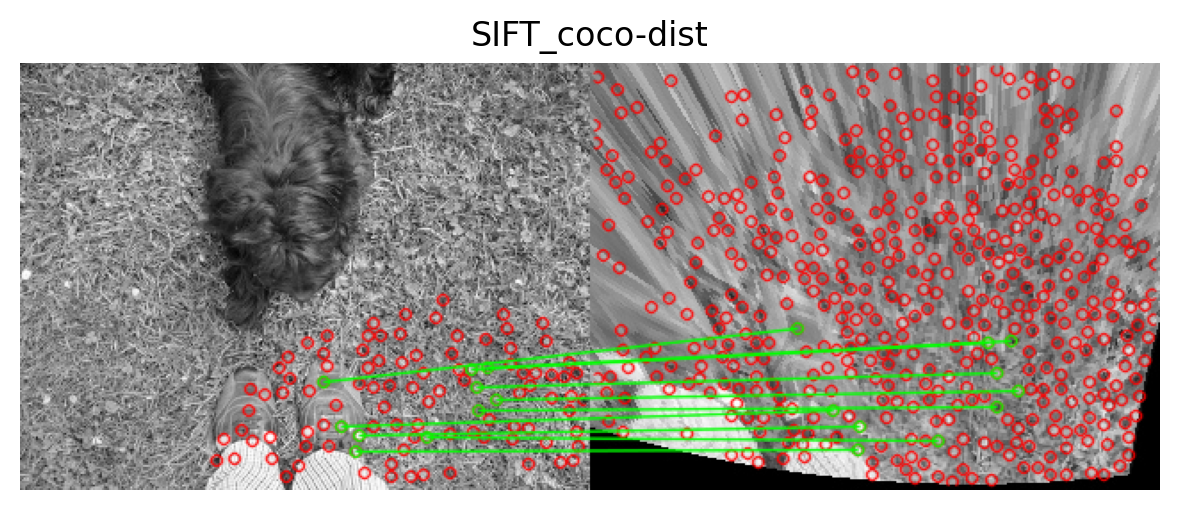

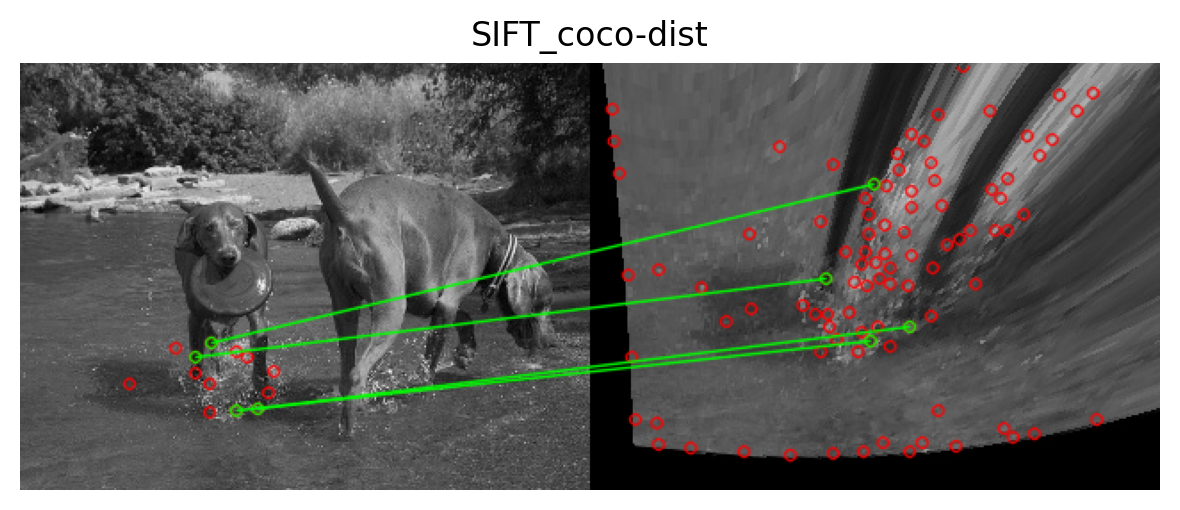

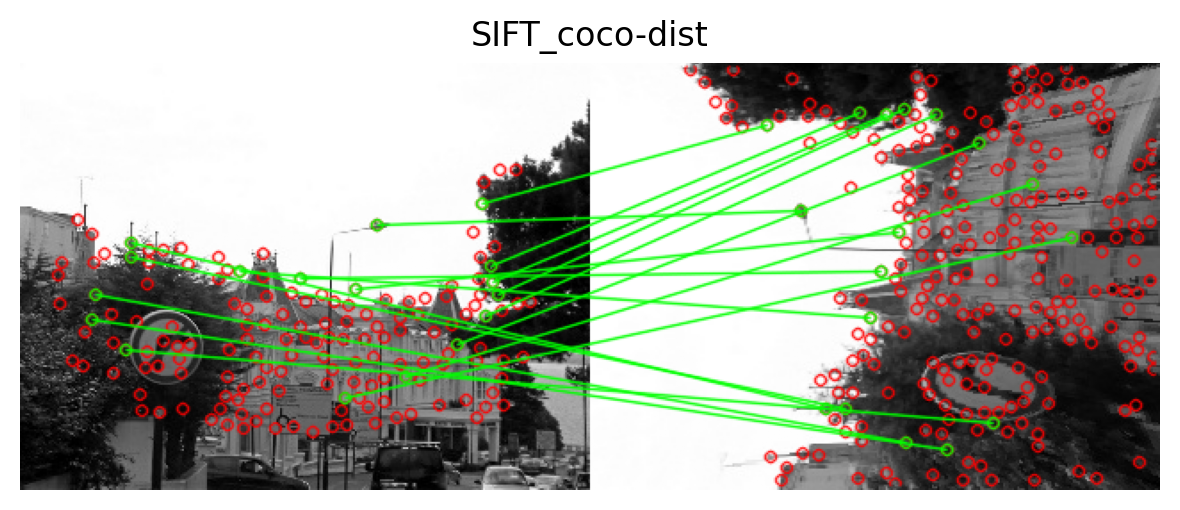

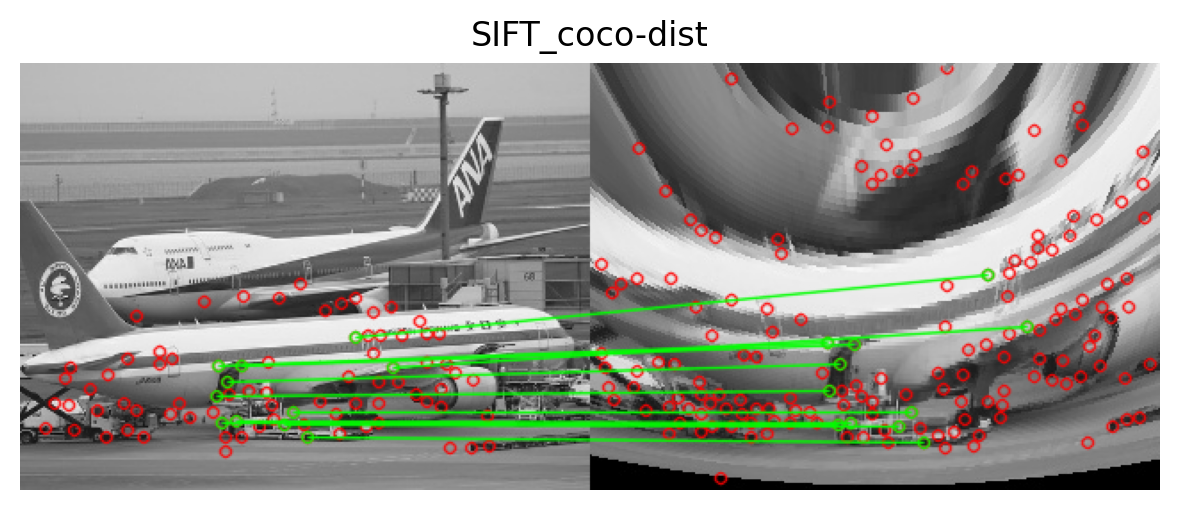

In [19]:
num_images = 5
for e in experiments:
    orb = True if e[:3] == 'orb' else False
    outputs = ev.get_homography_matches(e, keep_k_points=1000, correctness_thresh=3, num_images=num_images, orb=orb)
    #print(outputs)
    for output in outputs:
        img = np.float32(draw_matches(output) / 255.)
        plot_imgs([img], titles=[e], dpi=200)

# Homography Estimation

In [16]:
for exp in experiments:
    orb = True if exp[:3] == 'orb' else False
    correctness = ev.homography_estimation(exp, keep_k_points=1000, correctness_thresh=3, orb=orb)
    print('> {}: {}'.format(exp, correctness))

KeyboardInterrupt: 

# NN-mean Average Precision

In [17]:
for exp in experiments:
    res = ev.NN_mean_AP(exp)
    mAP = res['mean_AP']
    prec = res['prec']
    rec = res['recall']
   
    print('> {}: {}'.format(exp, mAP))
    print('> {}: {}'.format(exp, prec))
    print('> {}: {}'.format(exp, rec))
    

> SIFT_coco-dist: 0.2858565932795557
> SIFT_coco-dist: [[0.37030908 0.50657158 0.56169121 0.58989873 0.61495025 0.62958533
  0.63520904 0.62726606 0.61286679 0.59900555 0.58571581 0.57308047
  0.55871995 0.54315156 0.52862974 0.51496351 0.49997198 0.4859975
  0.47196685 0.45724759 0.44494896 0.43096827 0.41928924 0.40788144
  0.39516759 0.38370476 0.37223486 0.36173266 0.35233237 0.34294382]]
> SIFT_coco-dist: [[0.37030908 0.50657158 0.56169121 0.58989873 0.61495025 0.62958533
  0.63520904 0.62726606 0.61286679 0.59900555 0.58571581 0.57308047
  0.55871995 0.54315156 0.52862974 0.51496351 0.49997198 0.4859975
  0.47196685 0.45724759 0.44494896 0.43096827 0.41928924 0.40788144
  0.39516759 0.38370476 0.37223486 0.36173266 0.35233237 0.34294382]]


# Matching Score

In [18]:
for exp in experiments:
    ms = ev.matching_score(exp)
    print('> {}: {}'.format(exp, ms))
   

> SIFT_coco-dist: 0.25969910711622257


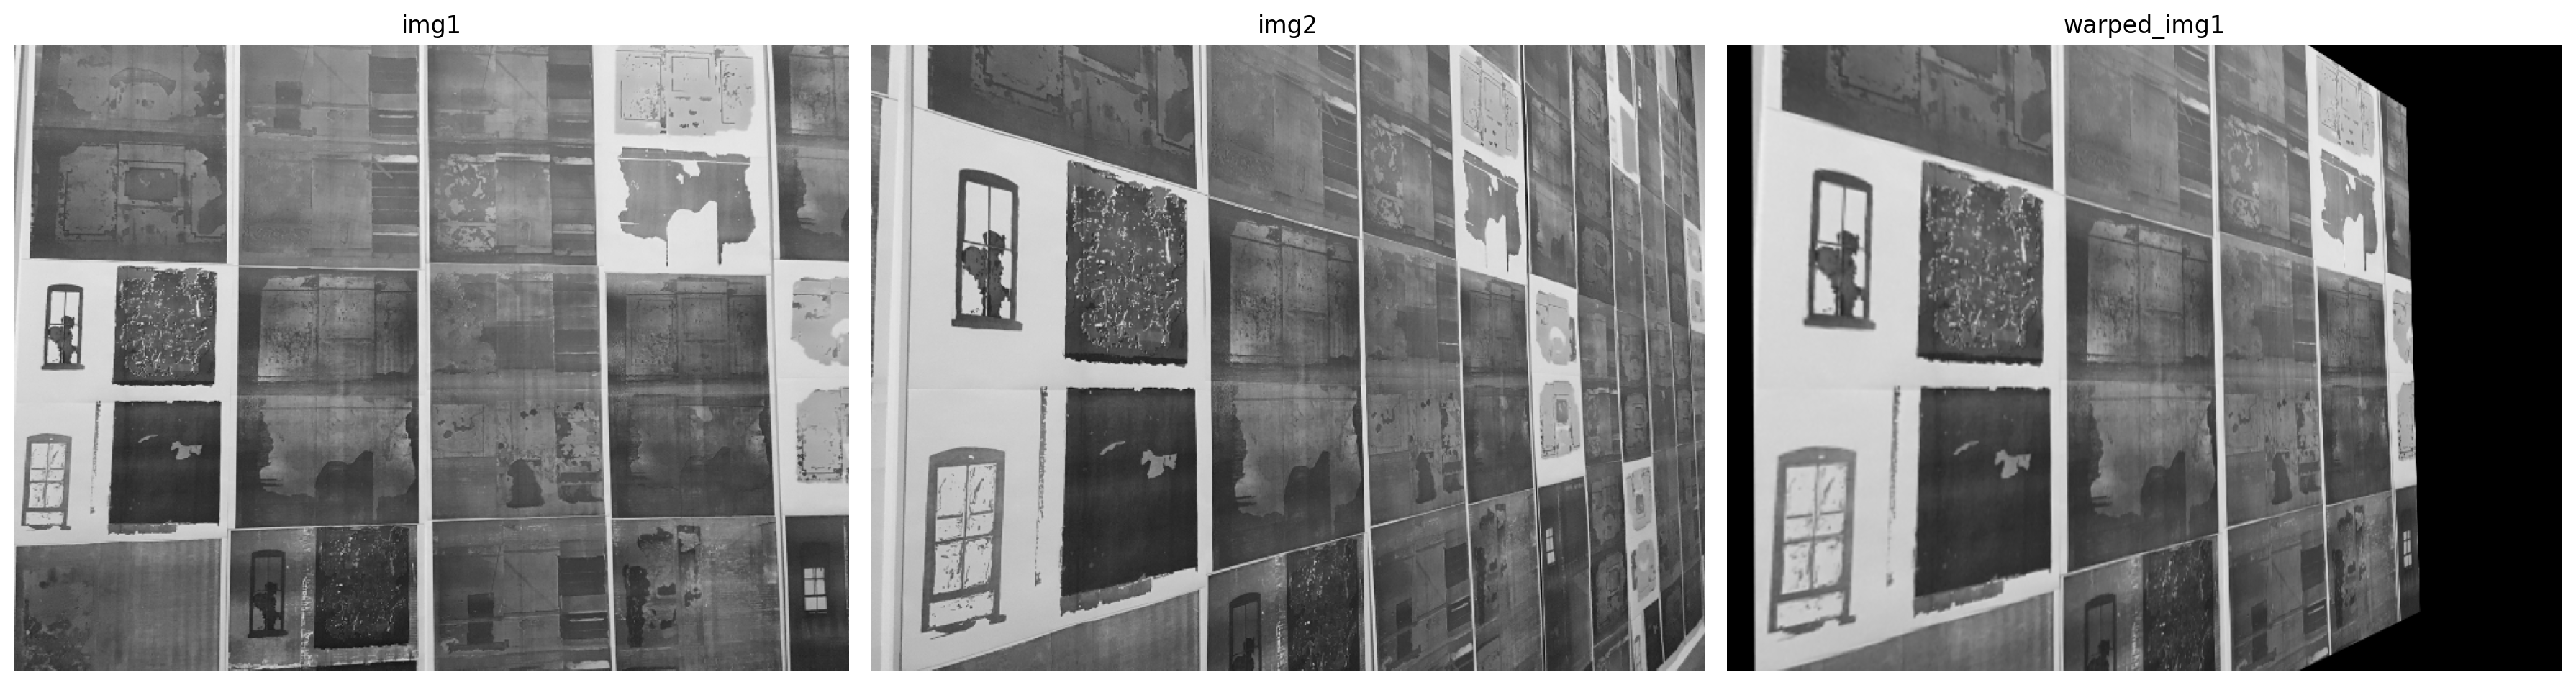

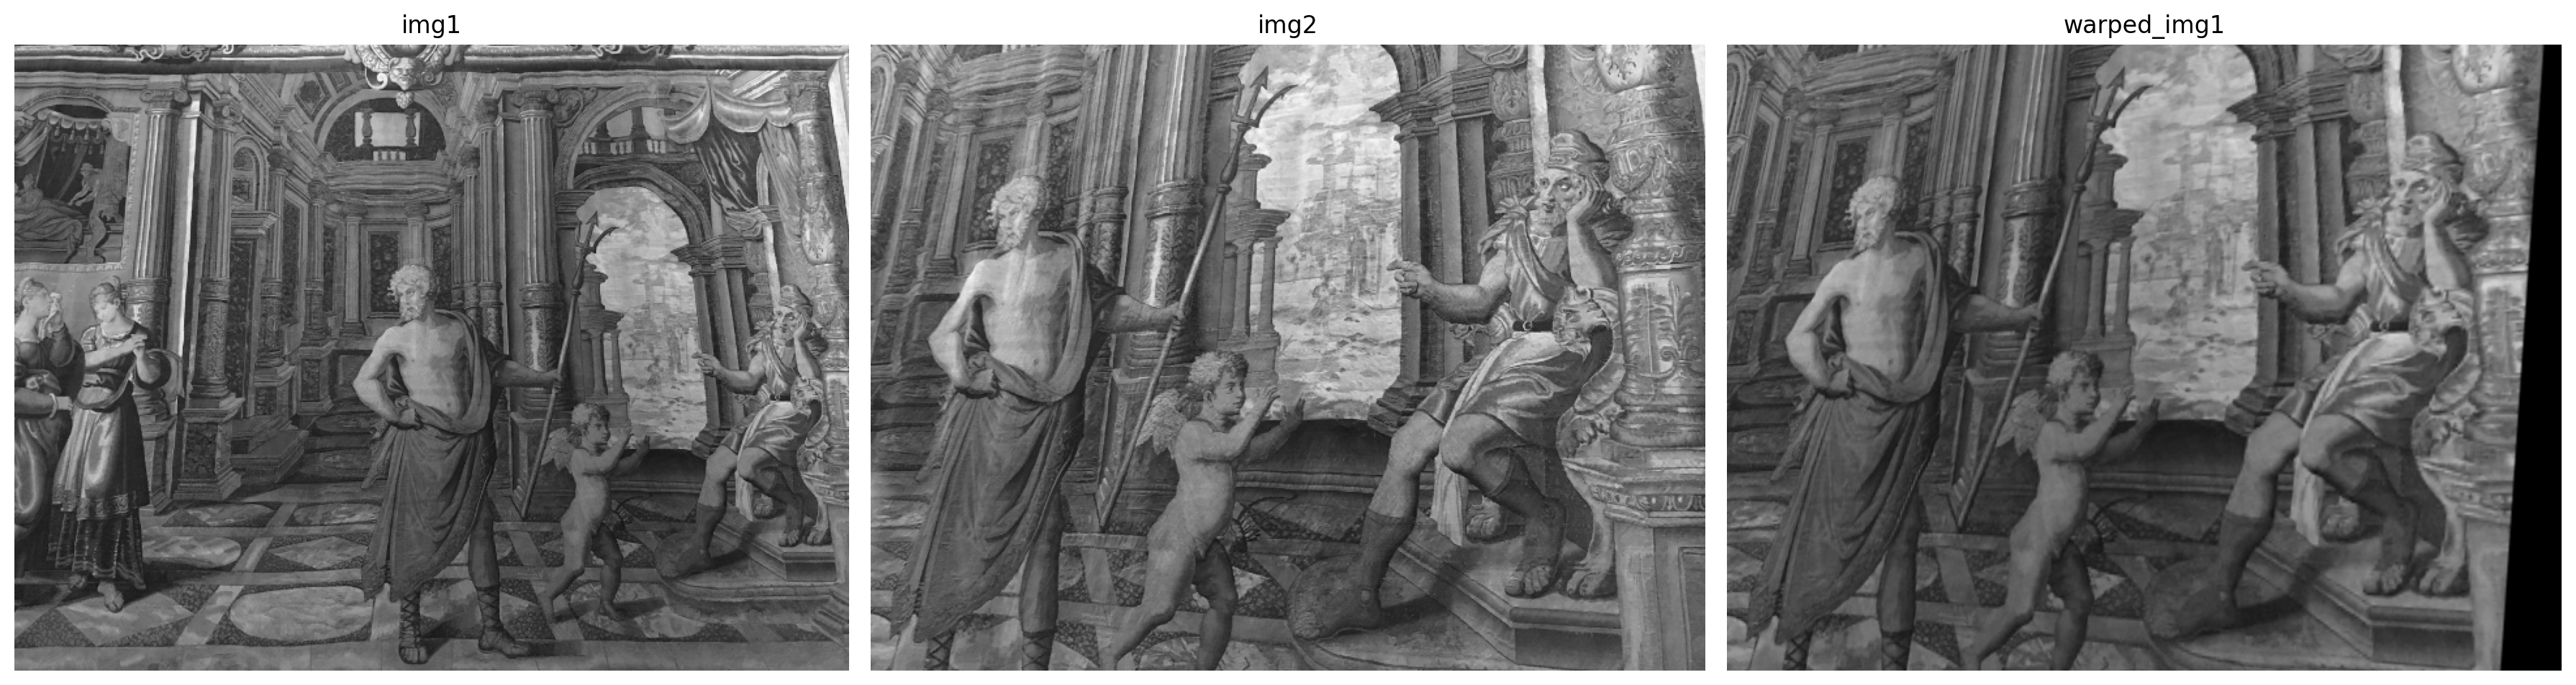

In [5]:
num_images = 2
for e in experiments:
    orb = True if e[:3] == 'orb' else False
    outputs = ev.get_homography_matches(e, keep_k_points=1000, correctness_thresh=3, num_images=num_images, orb=orb)
    for output in outputs:
        img1 = output['image1'] * 255
        img2 = output['image2'] * 255
        H = output['homography']
        warped_img1 = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))
        img1 = np.concatenate([img1, img1, img1], axis=2)
        warped_img1 = np.stack([warped_img1, warped_img1, warped_img1], axis=2)
        img2 = np.concatenate([img2, img2, img2], axis=2)
        plot_imgs([img1 / 255., img2 / 255., warped_img1 / 255.], titles=['img1', 'img2', 'warped_img1'], dpi=200)